# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10497, done.
remote: Total 10497 (delta 0), reused 0 (delta 0), pack-reused 10497
Receiving objects: 100% (10497/10497), 310.48 MiB | 34.25 MiB/s, done.
Resolving deltas: 100% (213/213), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

'Building AI Startups.gslides'	     'ingles exam.gdoc'
 Captura.PNG			      Ingles.gdoc
'Colab Notebooks'		     'Inglés IV  38448-104 ma y ju 11.00- 1:00'
 cosineSimilarity.gsheet	     'Jam sin título.gjam'
'Cuadro comparativo.gdoc'	      Letras.gdoc
'Documento sin título (1).gdoc'       Multimedia
'Documento sin título (2).gdoc'      'Practica7 crawler.gdoc'
'Documento sin título.gdoc'	     'Proyecto Final Sharck Dj en mp3.gdoc'
 Estudio			      Reporete.gdoc
'examen de ingles.gdoc'		     'Temas Html a explicar.gdoc'
'frases que no se.gdoc'		      Untitled0.ipynb
'Hoja de cálculo sin título.gsheet'  'zjh-tzyc-atv - 29 abr 2021.gjam'


# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Upper Confidence Bound (UCB)

# Cómo importar las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [ ]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Ads_CTR_Optimisation.csv')

# Algoritmo de UCB

In [ ]:
import math
N = 10000
d = 10
number_of_selections = [0] * d#array de 0 tamaño d que indica cuantas veces se escojio cada anuncio
sums_of_rewards = [0] * d#indica las recompensas de cada anuncio
ads_selected = []
total_reward = 0
for n in range(0, N):#se realizara para los 10000 usuarios
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):#en cada ronda mostramos los 10 anuncios
        if(number_of_selections[i]>0):#si el usuario ha visto por primera vez el anuncio upperbound no se calcula
            average_reward = sums_of_rewards[i] / number_of_selections[i]#veces que se dio click/total de veces mostradas
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])#calculamos intervalo de confianza
            upper_bound = average_reward + delta_i#limite superior del intervalo de confianza
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:#si el upper bound es el mayor encontrado guardamos este y el auncio en el que se calculo
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)#guardamos el anuncio con el mejor upper bound
    number_of_selections[ad] = number_of_selections[ad] + 1 #numero de veces que elegimos ese anuncio como mejor o con mayor upperbound
    reward = dataset.values[n, ad]#guardamos la recompensa de anuncio elegido
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward#sumamos el valor de la recompensa al previamente guardado
    total_reward = total_reward + reward#guardamos la suma total de recompensaas

# Histograma de resultados

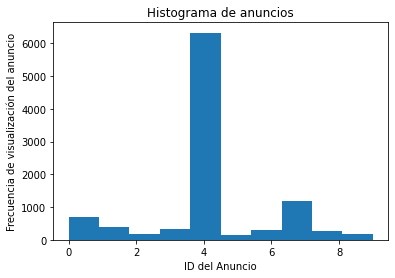

In [ ]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()